In [22]:
import pandas as pd
import numpy as np
import sklearn as sk

import keras as k
import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns

import os

import warnings
warnings.filterwarnings("ignore")



In [23]:
print ("---- version ----")
print ("Numpy: ", np.__version__)
print ("Pandas: ", pd.__version__)
print ("Sklearn : ", sk.__version__)
print ("keras: ", k.__version__)
print ("Tensorflow: ", tf.__version__)
print ("seaborn: ", sns.__version__)

if tf.test.gpu_device_name():
    print ("\nGPU: {}".format(tf.test.gpu_device_name()))
else:
    print ("\nCPU Version")

---- version ----
Numpy:  1.21.6
Pandas:  1.3.5
Sklearn :  1.0.2
keras:  2.3.1
Tensorflow:  1.15.5
seaborn:  0.12.1

CPU Version


In [24]:
np.random.seed(7)
tf.random.set_random_seed(7)

In [25]:
!ls


'ADTA 5550_ Assignment 2.ipynb'   Test_VM_JupyterNB.ipynb
'MLP on Iris with Keras.ipynb'	  iris.csv


In [26]:
fileName = "iris.csv"
df = pd.read_csv(fileName)
df.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [27]:
print ("df.shape: \n\n", df.shape)
print ("df.columns: \n\n", df.columns)
print ("df.dtypes: \n\n", df.dtypes)
print ("df.isnull().sum(): \n\n", df.isnull().sum())

df.shape: 

 (150, 5)
df.columns: 

 Index(['sepallength', 'sepalwidth', 'petallength', 'petalwidth', 'class'], dtype='object')
df.dtypes: 

 sepallength    float64
sepalwidth     float64
petallength    float64
petalwidth     float64
class           object
dtype: object
df.isnull().sum(): 

 sepallength    0
sepalwidth     0
petallength    0
petalwidth     0
class          0
dtype: int64


In [28]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["class"], axis = 1)
y = df["class"]
print ("df.head(2) \n", df.head(2))
print ("X.head(2) \n", X.head(2))
print ("y.head(2) \n", y.head(2))

X_train, X_test_val, y_train, y_test_val = train_test_split(X,y, test_size=.40, random_state=7)
X_val, X_test, y_val, y_test = train_test_split(X_test_val,y_test_val, test_size=.50, random_state=7)


df.head(2) 
    sepallength  sepalwidth  petallength  petalwidth        class
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
X.head(2) 
    sepallength  sepalwidth  petallength  petalwidth
0          5.1         3.5          1.4         0.2
1          4.9         3.0          1.4         0.2
y.head(2) 
 0    Iris-setosa
1    Iris-setosa
Name: class, dtype: object


## Encoding Methods of Categorical data


In [29]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()

y_train = lb.fit_transform(y_train)
print(lb.classes_)
y_train = pd.DataFrame(y_train, columns=lb.classes_)

y_val = lb.transform(y_val)
y_val = pd.DataFrame(y_val, columns=lb.classes_)

y_test = lb.transform(y_test)
y_test = pd.DataFrame(y_test, columns=lb.classes_)

print(y_test.head(2))

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
   Iris-setosa  Iris-versicolor  Iris-virginica
0            0                1               0
1            0                1               0


In [30]:
from keras.models import Sequential
from keras.layers import Dense

def model_1():
    model = Sequential()
    model.add(Dense(8, input_dim=4,activation='relu'))
    model.add(Dense(3, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy',
                 optimizer='adam',
                metrics=['accuracy'])
    return model


In [31]:
from keras.models import Model
from keras.layers import Input

def model_2():
    input_layer = Input(shape=(4,))x
    hidden_layer = Dense(8, activation='relu')(input_layer)
    output_layer = Dense(3, activation='softmax')(hidden_layer)

    model = Model(inputs=input_layer, outputs=output_layer)

    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
    return model

In [32]:


def model_3():
    input_layer = Input(shape=(4,))
    hidden_layer_1 = Dense(8, activation='relu')(input_layer)
    hidden_layer_2 = Dense(8, activation='relu')(hidden_layer_1)
    output_layer = Dense(3, activation='softmax')(hidden_layer_2)

    model = Model(inputs=input_layer, outputs=output_layer)

    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
    return model

In [33]:
model_1= model_1()
history_1 = model_1.fit(X_train,y_train, epochs=150,batch_size=10, validation_data=(X_val, y_val)) 


Train on 90 samples, validate on 30 samples
Epoch 1/150
90/90 [==============================] - 0s 5ms/step - loss: 4.4436 - accuracy: 0.3222 - val_loss: 3.8325 - val_accuracy: 0.3333
Epoch 2/150
90/90 [==============================] - 0s 188us/step - loss: 3.9947 - accuracy: 0.3222 - val_loss: 3.4119 - val_accuracy: 0.3333
Epoch 3/150
90/90 [==============================] - 0s 177us/step - loss: 3.5665 - accuracy: 0.3222 - val_loss: 3.0034 - val_accuracy: 0.3333
Epoch 4/150
90/90 [==============================] - 0s 179us/step - loss: 3.1711 - accuracy: 0.3222 - val_loss: 2.6133 - val_accuracy: 0.3333
Epoch 5/150
90/90 [==============================] - 0s 184us/step - loss: 2.7934 - accuracy: 0.3222 - val_loss: 2.2665 - val_accuracy: 0.3333
Epoch 6/150
90/90 [==============================] - 0s 187us/step - loss: 2.4633 - accuracy: 0.3222 - val_loss: 1.9694 - val_accuracy: 0.3333
Epoch 7/150
90/90 [==============================] - 0s 190us/step - loss: 2.1883 - accuracy: 0.3222

In [34]:
model_2= model_2()
history_2 = model_2.fit(X_train,y_train, epochs=150,batch_size=10, validation_data=(X_val, y_val)) 


Train on 90 samples, validate on 30 samples
Epoch 1/150
90/90 [==============================] - 0s 5ms/step - loss: 2.9456 - accuracy: 0.3444 - val_loss: 3.0242 - val_accuracy: 0.2667
Epoch 2/150
90/90 [==============================] - 0s 192us/step - loss: 2.6909 - accuracy: 0.3444 - val_loss: 2.7512 - val_accuracy: 0.2667
Epoch 3/150
90/90 [==============================] - 0s 200us/step - loss: 2.4679 - accuracy: 0.3667 - val_loss: 2.5274 - val_accuracy: 0.3667
Epoch 4/150
90/90 [==============================] - 0s 189us/step - loss: 2.2854 - accuracy: 0.5111 - val_loss: 2.3358 - val_accuracy: 0.6333
Epoch 5/150
90/90 [==============================] - 0s 186us/step - loss: 2.1111 - accuracy: 0.6667 - val_loss: 2.1698 - val_accuracy: 0.6667
Epoch 6/150
90/90 [==============================] - 0s 190us/step - loss: 1.9720 - accuracy: 0.6778 - val_loss: 2.0010 - val_accuracy: 0.6667
Epoch 7/150
90/90 [==============================] - 0s 195us/step - loss: 1.8162 - accuracy: 0.6778

In [35]:
model_3= model_3()
history_3 = model_3.fit(X_train,y_train, epochs=150,batch_size=10, validation_data=(X_val, y_val)) 


Train on 90 samples, validate on 30 samples
Epoch 1/150
90/90 [==============================] - 1s 7ms/step - loss: 1.3523 - accuracy: 0.3444 - val_loss: 1.3513 - val_accuracy: 0.2667
Epoch 2/150
90/90 [==============================] - 0s 251us/step - loss: 1.2561 - accuracy: 0.3556 - val_loss: 1.2475 - val_accuracy: 0.4000
Epoch 3/150
90/90 [==============================] - 0s 242us/step - loss: 1.1782 - accuracy: 0.5889 - val_loss: 1.1632 - val_accuracy: 0.6667
Epoch 4/150
90/90 [==============================] - 0s 245us/step - loss: 1.1138 - accuracy: 0.6778 - val_loss: 1.0970 - val_accuracy: 0.6667
Epoch 5/150
90/90 [==============================] - 0s 242us/step - loss: 1.0624 - accuracy: 0.6778 - val_loss: 1.0423 - val_accuracy: 0.6667
Epoch 6/150
90/90 [==============================] - 0s 245us/step - loss: 1.0165 - accuracy: 0.6778 - val_loss: 0.9960 - val_accuracy: 0.6667
Epoch 7/150
90/90 [==============================] - 0s 241us/step - loss: 0.9734 - accuracy: 0.6778

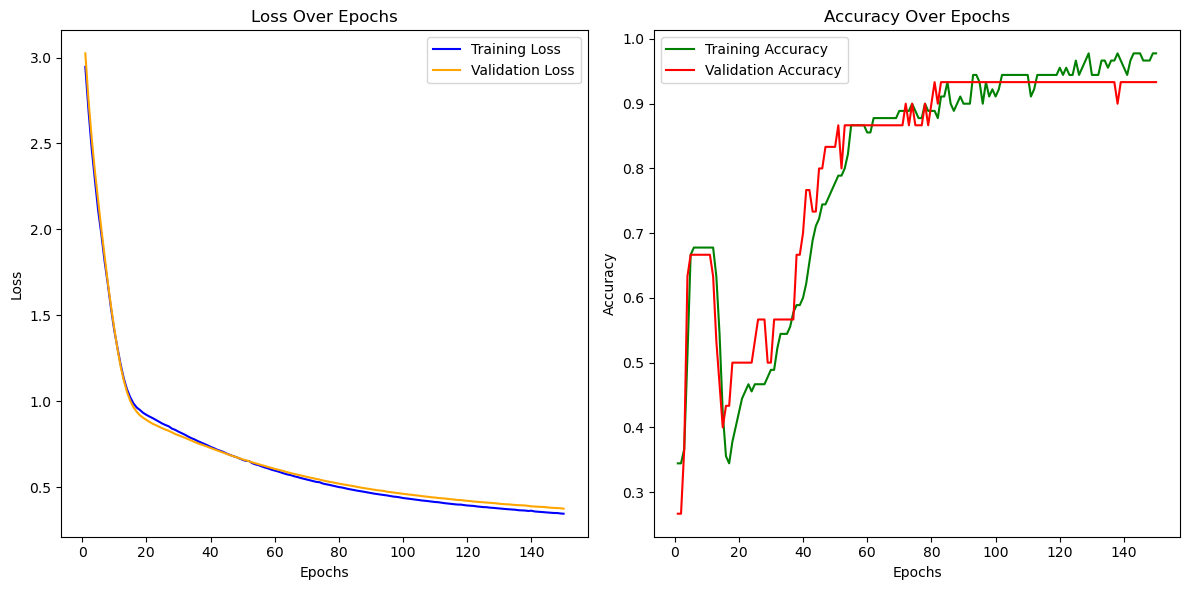

In [40]:
training_loss = history_2.history['loss']
validation_loss = history_2.history['val_loss']
training_accuracy = history_2.history['accuracy']
validation_accuracy = history_2.history['val_accuracy']

epochs_range = range(1, len(training_loss) + 1)

plt.figure(figsize=(12, 6))

# Subplot for Loss
plt.subplot(1, 2, 1)
plt.plot(epochs_range, training_loss, label='Training Loss', color='blue')
plt.plot(epochs_range, validation_loss, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()

# Subplot for Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs_range, training_accuracy, label='Training Accuracy', color='green')
plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

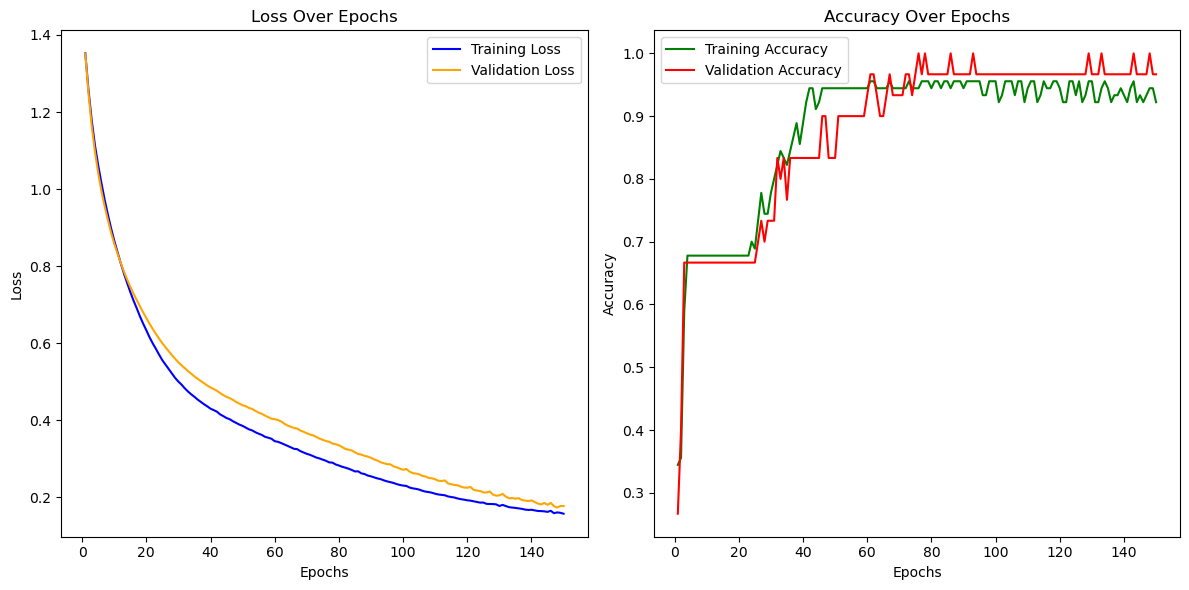

In [37]:
training_loss = history_3.history['loss']
validation_loss = history_3.history['val_loss']
training_accuracy = history_3.history['accuracy']
validation_accuracy = history_3.history['val_accuracy']

epochs_range = range(1, len(training_loss) + 1)

plt.figure(figsize=(12, 6))

# Subplot for Loss
plt.subplot(1, 2, 1)
plt.plot(epochs_range, training_loss, label='Training Loss', color='blue')
plt.plot(epochs_range, validation_loss, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()

# Subplot for Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs_range, training_accuracy, label='Training Accuracy', color='green')
plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

In [38]:
score = model_1.evaluate(X_test,y_test)
print("Model 1: no hidden layers" , model_1.metrics_names[1], score[1]*100)

score = model_2.evaluate(X_test,y_test)
print("Model 2: with one hidden layer" , model_2.metrics_names[1], score[1]*100)


score = model_3.evaluate(X_test,y_test)
print("Model 3: with two hidden layer" , model_3.metrics_names[1], score[1]*100)


30/30 [==============================] - 0s 44us/step
Model 1: no hidden layers accuracy 89.99999761581421
30/30 [==============================] - 0s 36us/step
Model 2: with one hidden layer accuracy 89.99999761581421
30/30 [==============================] - 0s 37us/step
Model 3: with two hidden layer accuracy 100.0
